In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import DBSCAN

In [2]:
x,y=make_blobs(n_samples=300,centers=4,cluster_std=0.5,random_state=0)

In [3]:
x.shape

(300, 2)

In [4]:
y.shape

(300,)

In [5]:
db=DBSCAN(eps=0.3,min_samples=10).fit(x)


In [6]:
core_sample_mask=np.zeros_like(db.labels_,dtype=bool)
core_sample_mask[db.core_sample_indices_]=True
labels=db.labels_
labelswithoutnoise=set(labels)
print(core_sample_mask)

[False  True False False False False False False False False  True False
  True False False False  True False  True False False False False False
  True False  True  True False False False False False False  True False
 False False False  True False False False False  True  True  True  True
  True False False False False  True False  True False False  True False
 False  True False  True False  True False  True False  True False False
  True  True False False  True  True  True  True False  True False False
 False False  True False False  True False  True False  True  True False
 False False False False False False False False  True False False False
 False False False False False False  True False  True False False False
 False  True False  True False  True  True False False False False  True
  True False False False False False False False False  True False False
 False  True  True False False  True  True  True False False False  True
 False  True  True False False  True  True False  T

In [7]:
n_clusters_=len(set(labels))-(1 if -1 in labels else 0)
unique_labels=set(labels)
print(f"clusters{n_clusters_}")
print(f"unique_labels{unique_labels}")

clusters4
unique_labels{0, 1, 2, 3, -1}


In [8]:
colors=["y","b","g","r"]
for k , col in zip(unique_labels,colors):
    print(list(zip(unique_labels,colors)))

[(0, 'y'), (1, 'b'), (2, 'g'), (3, 'r')]
[(0, 'y'), (1, 'b'), (2, 'g'), (3, 'r')]
[(0, 'y'), (1, 'b'), (2, 'g'), (3, 'r')]
[(0, 'y'), (1, 'b'), (2, 'g'), (3, 'r')]


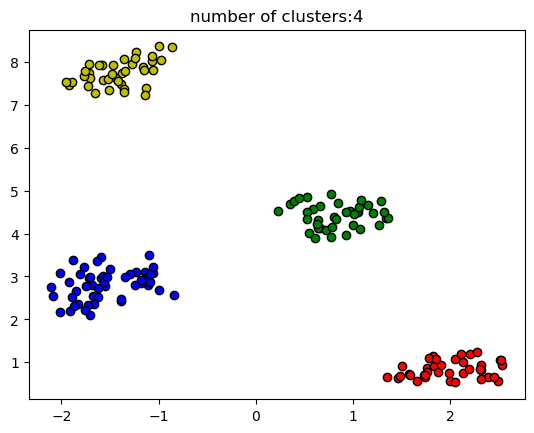

In [9]:
colors=["y","b","g","r"]
for k , col in zip(unique_labels,colors):
    class_member_mask=(labels==k)
    xy=x[class_member_mask&core_sample_mask]
    plt.plot(xy[:,0],xy[:,1],"o",markerfacecolor=col,markeredgecolor="k",markersize=6)
    xy=x[class_member_mask&~core_sample_mask]
    plt.plot(xy[:,0],xy[:,1],"o",markerfacecolor=col,markeredgecolor="k",markersize=6)
plt.title("number of clusters:%d"%n_clusters_)
plt.show()
    

In [10]:
from sklearn.datasets import load_iris

In [11]:
iris=load_iris()
x=iris.data

In [25]:
dbscan=DBSCAN(eps=0.7,min_samples=4)
dbscan.fit(x)
labels=dbscan.labels_

In [26]:
np.histogram(labels)

(array([49,  0,  0,  0,  0, 92,  0,  0,  0,  4], dtype=int64),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]))

(array([49.,  0.,  0.,  0.,  0., 92.,  0.,  0.,  0.,  4.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

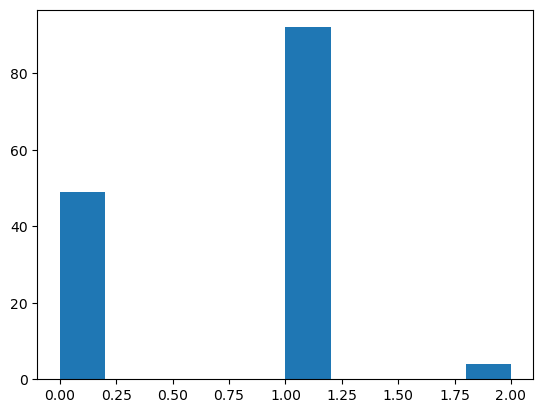

In [27]:
plt.hist(labels)

In [28]:
n_clusters_=len(set(labels))-(1 if -1 in labels else 0)
n_clusters_

3

In [29]:
unique_labels=set(labels)
unique_labels

{0, 1, 2}

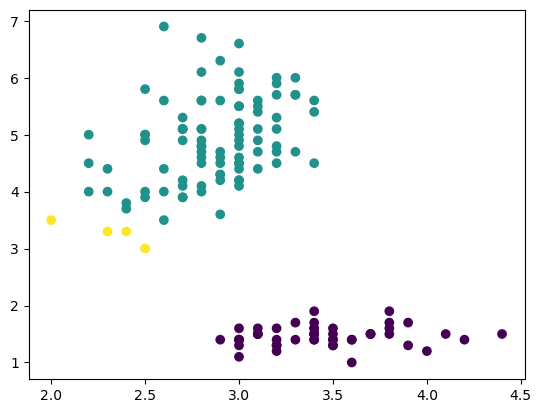

In [30]:
plt.scatter(x[:,1],x[:,2],c=labels)
plt.show()

In [31]:
cl=dbscan.fit_predict(x)

In [32]:
import pandas as pd
x=pd.DataFrame(x)
x["m"]=list(dbscan.labels_)
x

,0,1,2,3,4,m
0,5.1,3.5,1.4,0.2,0.0,0
1,4.9,3.0,1.4,0.2,0.0,0
2,4.7,3.2,1.3,0.2,0.0,0
3,4.6,3.1,1.5,0.2,0.0,0
4,5.0,3.6,1.4,0.2,0.0,0
...,...,...,...,...,...,...
140,6.7,3.0,5.2,2.3,1.0,1
141,6.3,2.5,5.0,1.9,1.0,1
142,6.5,3.0,5.2,2.0,1.0,1
143,6.2,3.4,5.4,2.3,1.0,1


In [33]:
x=x[x["m"]!=-1]
x.shape

(145, 6)

In [34]:
y=x["m"]
y

0      0
1      0
2      0
3      0
4      0
      ..
140    1
141    1
142    1
143    1
144    1
Name: m, Length: 145, dtype: int64

In [35]:
x=x.values
y=y.values

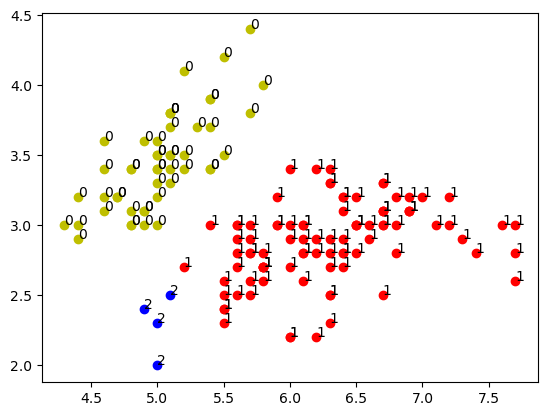

In [36]:
colors=["y","r","b"]
for i in range(len(x)):
    plt.scatter(x[i,0],x[i,1],c=colors[labels[i]])
    plt.annotate(str(labels[i]),(x[i,0],x[i,1]))
plt.show()
    

In [24]:
?plt.annotate

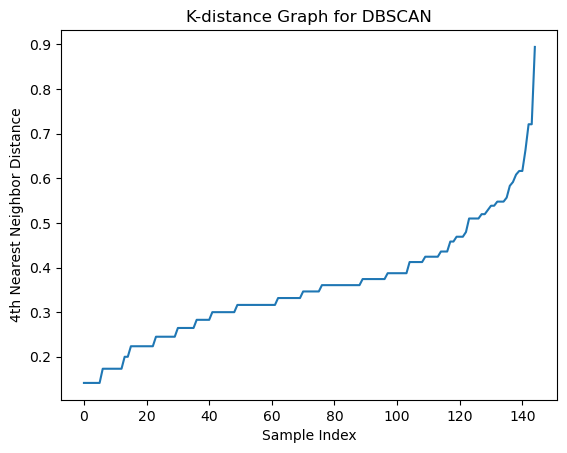

In [39]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
neigh = NearestNeighbors(n_neighbors=4) 
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)
distances = np.sort(distances[:, 3])
plt.plot(distances)
plt.ylabel("4th Nearest Neighbor Distance")
plt.xlabel("Sample Index")
plt.title("K-distance Graph for DBSCAN")
plt.show()

In [41]:
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


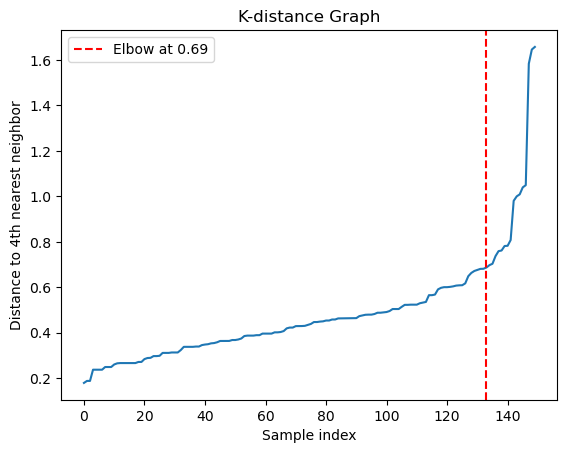

مقدار مناسب eps حدوداً برابر است با: 0.69


In [42]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import matplotlib.pyplot as plt
import numpy as np
data = load_iris()
X = StandardScaler().fit_transform(data.data)
k = 4
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:, k-1])
plt.plot(distances)
plt.xlabel("Sample index")
plt.ylabel(f"Distance to {k}th nearest neighbor")
plt.title("K-distance Graph")

knee = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
plt.axvline(x=knee.knee, color='r', linestyle='--', label=f"Elbow at {distances[knee.knee]:.2f}")
plt.legend()
plt.show() 

print(f"مقدار مناسب eps حدوداً برابر است با: {distances[knee.knee]:.2f}")

In [43]:
name=input("enter your name")
age=int(input('enter your age'))
print("my name is",name,"Im",age, "years old")
print(f"my name is {name},Im {age} years old")


enter your namefatemeh
enter your age39
my name is fatemeh Im 39 years old
my name isfatemeh,Im39years old
